tensor(14.)


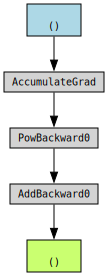

In [1]:
# Import the torch library
import torch 
from torchviz import make_dot

# Assign any value for x as tensor form
# Set requires_grad=True So,
# that autograd will record the operations
x=torch.tensor(7.0,requires_grad=True)

# Define the equation
f = (x**2)+3

# Differentiate using torch
#Uses backward function to compute the gradient value
f.backward()

# Print the derivative value
# of y i.e dy/dx = 2x = 2 X 7.0 = 14.
print(x.grad)

# Plot the computational graph
make_dot(f)


tensor([[ 22.,  45.,  74.],
        [109., 150., 197.],
        [250., 309., 374.]])


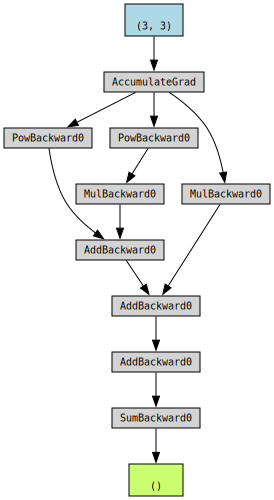

In [2]:
# import the library
import torch
from torchviz import make_dot

# Assign the input variable
x = torch_input=torch.tensor([[1.0,2.0,3.0],
							[4.0,5.0,6.0],
							[7.0,8.0,9.0]],requires_grad=True)

# define the function
def f(x):
	return (x**3) + 7*(x**2) + 5*x + 10

# Assign the sum to another variable z
z=f(x).sum()

# Compute the gradient
z.backward()

# Find the gradient value
print(x.grad)

#Plot the computational graph
make_dot(z)


Gradient of x: tensor([-0.3018])
Gradient of b: tensor([1.])
Gradient of w: tensor([0.6569])


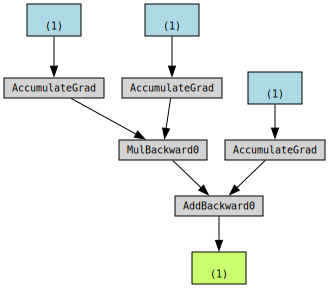

In [3]:
# Import the torch library
import torch 
from torchviz import make_dot

# Define Input variable
x = torch.randn(1, requires_grad=True)
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Define the graph structure
# Forward pass
y = w * x + b

# Backward pass
y.backward()

#View the outputs
print("Gradient of x:", x.grad)
print("Gradient of b:", b.grad)
print("Gradient of w:", w.grad)

# Update parameters
w.data -= 0.01 * w.grad.data
b.data -= 0.01 * b.grad.data

# Plot the computational graph
make_dot(y)


In [ ]:
class CNN:
    def __init__(self, num_classes):
        self.num_classes = num_classes
        self.layers = []

    def cross_correlation(self, x, kernel, stride=1, padding=0):
        if not isinstance(x, torch.Tensor):
            x = torch.tensor(x, dtype=torch.float32)
        if not isinstance(kernel, torch.Tensor):
            kernel = torch.tensor(kernel, dtype=torch.float32)
        
        if padding > 0:
            x = torch.nn.functional.pad(x, (padding, padding, padding, padding))
        
        C, H, W = x.shape
        KH, KW = kernel.shape
        
        output_H = (H - KH) // stride + 1
        output_W = (W - KW) // stride + 1
        
        feature_map = torch.zeros((C, output_H, output_W))
        
        for c in range(C):
            for i in range(0, output_H):
                for j in range(0, output_W):
                    feature_map[c, i, j] = torch.sum(
                        x[c, i*stride:i*stride+KH, j*stride:j*stride+KW] * kernel[c]
                    )
        
        return feature_map
    
    def pooling(self, feature_maps, stride, kernel_size, type="max"):
        if not isinstance(feature_maps, torch.Tensor):
            feature_maps = torch.tensor(feature_maps, dtype=torch.float32)

        C, H_fm, W_fm = feature_maps.shape
        KH, KW = kernel_size

        output_H = (H_fm - KH) // stride + 1
        output_W = (W_fm - KW) // stride + 1

        pooled_feature_maps = torch.zeros((C, output_H, output_W))

        for i in range(C):
            for j in range(output_H):
                for k in range(output_W):
                    if type == "max":
                        pooled_feature_maps[i, j, k] = torch.max(
                            feature_maps[i, j*stride:j*stride+KH, k*stride:k*stride+KW]
                        )
                    elif type == "average":
                        pooled_feature_maps[i, j, k] = torch.mean(
                            feature_maps[i, j*stride:j*stride+KH, k*stride:k*stride+KW]
                        )

        return pooled_feature_maps
    
    def add_layer(self, type, size, kernel_size = (3, 3), stride = 1, padding = 0, activation_function = 'Relu'):
        if type == 'convolution':
            layer = {
                'type': 'convolution',
                'size': size,
                'kernel_size': kernel_size,
                'stride': stride,
                'padding': padding,
                'activation_function': activation_function
            }
        elif type == 'pooling':
            layer = {
                'type': 'pooling',
                'kernel_size': kernel_size,
                'stride': stride
            }
        elif type == 'fully_connected':
            layer = {
                'type': 'fully_connected',
                'size': size,
                'activation_function': activation_function
            }



        self.layers.append(layer)
    
    def train(self, X_train, Y_train, epochs = 1000, batch_size = 32, learning_rate = 0.01):
        for epoch in range(epochs):
            # shuffle the data
            indices = torch.randperm(X_train.shape[0])
            X_train = X_train[indices]
            Y_train = Y_train[indices]

            kernels = []
            weights = []
            biases = []
            
            for layer in self.layers:
                layer_kernel = []
                if layer['type'] == 'convolution':
                    for i in range(layer['size']):
                        kernel = torch.randn(layer['kernel_size'], requires_grad=True)
                        layer_kernel.append(kernel)
                    kernels.append(layer_kernel)

            for i in range(0, X_train.shape[0], batch_size):
                x = X_train[i:i+batch_size]
                y = Y_train[i:i+batch_size]

                for image in x:
                    feature_maps = []

                    for layer_kernel,layer in zip(kernels,self.layers):
                        # now , layer_kernel is a list of kernels for each layer
                        # and layer is a dictionary containing the layer information
                        # now, for each layer if it is convolutional layer, we will make a feature map and apply cross correlation
                        if layer['type'] == 'convolution':
                            feature_map = []
                            for kernel in layer_kernel:
                                feature_map.append(self.cross_correlation(image, kernel, layer['stride'], layer['padding']))
                            feature_maps.append(feature_map)
                        elif layer['type'] == 'pooling':
                            feature_maps = self.pooling(feature_maps[-1], layer['stride'], layer['kernel_size'])

                    # now, we have the feature maps for the image

                    # now, we will flatten the feature maps
                    flattened_feature_maps = torch.flatten(feature_maps[-1])

                    # now, we will apply the fully connected layers
                    for layer in self.layers:
                        if layer['type'] == 'fully_connected':
                            weight = torch.randn(layer['size'], requires_grad=True)
                            bias = torch.randn(1, requires_grad=True)

                            


                        


                    


        




In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)



Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [7]:
import torch.nn.functional as F

class CNN:
    def __init__(self, num_classes):
        self.num_classes = num_classes
        self.layers = []

    def cross_correlation(self, x, kernel, stride=1, padding=0):
        if not isinstance(x, torch.Tensor):
            x = torch.tensor(x, dtype=torch.float32)
        if not isinstance(kernel, torch.Tensor):
            kernel = torch.tensor(kernel, dtype=torch.float32)
        
        if padding > 0:
            x = torch.nn.functional.pad(x, (padding, padding, padding, padding))
        
        C, H, W = x.shape
        KH, KW = kernel.shape
        
        output_H = (H - KH) // stride + 1
        output_W = (W - KW) // stride + 1
        
        feature_map = torch.zeros((C, output_H, output_W))
        
        for c in range(C):
            for i in range(0, output_H):
                for j in range(0, output_W):
                    feature_map[c, i, j] = torch.sum(
                        x[c, i*stride:i*stride+KH, j*stride:j*stride+KW] * kernel[c]
                    )
        
        return feature_map
    
    def pooling(self, feature_maps, stride, kernel_size, type="max"):
        if not isinstance(feature_maps, torch.Tensor):
            feature_maps = torch.tensor(feature_maps, dtype=torch.float32)

        C, H_fm, W_fm = feature_maps.shape
        KH, KW = kernel_size

        output_H = (H_fm - KH) // stride + 1
        output_W = (W_fm - KW) // stride + 1

        pooled_feature_maps = torch.zeros((C, output_H, output_W))

        for i in range(C):
            for j in range(output_H):
                for k in range(output_W):
                    if type == "max":
                        pooled_feature_maps[i, j, k] = torch.max(
                            feature_maps[i, j*stride:j*stride+KH, k*stride:k*stride+KW]
                        )
                    elif type == "average":
                        pooled_feature_maps[i, j, k] = torch.mean(
                            feature_maps[i, j*stride:j*stride+KH, k*stride:k*stride+KW]
                        )

        return pooled_feature_maps
    
    def add_layer(self, type, size = 1, kernel_size = (3, 3), stride = 1, padding = 0, activation_function = 'Relu'):
        if type == 'convolution':
            layer = {
                'type': 'convolution',
                'size': size,
                'kernel_size': kernel_size,
                'stride': stride,
                'padding': padding,
                'activation_function': activation_function
            }
        elif type == 'pooling':
            layer = {
                'type': 'pooling',
                'kernel_size': kernel_size,
                'stride': stride
            }
        elif type == 'fully_connected':
            layer = {
                'type': 'fully_connected',
                'size': size,
                'activation_function': activation_function
            }

        self.layers.append(layer)
    
    def train(self, X_train, Y_train, epochs = 10, batch_size = 32, learning_rate = 0.01):
        kernels = []
        fc_layers = []

        for layer in self.layers:
            if layer['type'] == 'convolution':
                layer_kernel = [torch.randn(layer['kernel_size'], requires_grad=True) for _ in range(layer['size'])]
                kernels.append(layer_kernel)
            elif layer['type'] == 'fully_connected':
                fc_weight = torch.randn(layer['size'], requires_grad=True)
                fc_bias = torch.randn(layer['size'], requires_grad=True)
                fc_layers.append((fc_weight, fc_bias))

        optimizer = torch.optim.SGD([{'params': kernel} for layer_kernel in kernels for kernel in layer_kernel] +
                                    [{'params': param} for fc_weight, fc_bias in fc_layers for param in [fc_weight, fc_bias]], lr=learning_rate)

        for epoch in range(epochs):
            running_loss = 0.0
            for i in range(0, X_train.shape[0], batch_size):
                x_batch = X_train[i:i+batch_size]
                y_batch = Y_train[i:i+batch_size]

                batch_loss = 0
                optimizer.zero_grad()

                for image, label in zip(x_batch, y_batch):
                    feature_maps = [image]

                    for layer, layer_kernel in zip(self.layers, kernels):
                        if layer['type'] == 'convolution':
                            new_feature_maps = []
                            for kernel in layer_kernel:
                                new_feature_maps.append(self.cross_correlation(feature_maps[-1], kernel, layer['stride'], layer['padding']))
                            feature_maps.append(torch.stack(new_feature_maps))
                        elif layer['type'] == 'pooling':
                            feature_maps.append(self.pooling(feature_maps[-1], layer['stride'], layer['kernel_size']))

                    flattened_feature_maps = feature_maps[-1].view(-1)

                    output = flattened_feature_maps
                    for fc_weight, fc_bias in fc_layers:
                        output = torch.matmul(output, fc_weight) + fc_bias
                        if layer.get('activation_function', None) == 'Relu':
                            output = F.relu(output)

                    loss = F.cross_entropy(output.view(1, -1), label.view(1))
                    batch_loss += loss

                batch_loss.backward()
                optimizer.step()
                make_dot(batch_loss).render(f'batch_loss_{i}')

            print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(X_train)}')
    
    def predict(self, X):
        with torch.no_grad():
            feature_maps = [X]
            for layer, layer_kernel in zip(self.layers, kernels):
                if layer['type'] == 'convolution':
                    new_feature_maps = []
                    for kernel in layer_kernel:
                        new_feature_maps.append(self.cross_correlation(feature_maps[-1], kernel, layer['stride'], layer['padding']))
                    feature_maps.append(torch.stack(new_feature_maps))
                elif layer['type'] == 'pooling':
                    feature_maps.append(self.pooling(feature_maps[-1], layer['stride'], layer['kernel_size']))

            flattened_feature_maps = feature_maps[-1].view(-1)

            output = flattened_feature_maps
            for fc_weight, fc_bias in fc_layers:
                output = torch.matmul(output, fc_weight) + fc_bias
                if layer.get('activation_function', None) == 'Relu':
                    output = F.relu(output)

            return torch.argmax(output)


In [8]:
num_classes = 10  # MNIST has 10 classes
model = CNN(num_classes)
model.add_layer('convolution', size=32, kernel_size=(3, 3), stride=1, padding=1)
model.add_layer('pooling', kernel_size=(2, 2), stride=2)
model.add_layer('convolution', size=64, kernel_size=(3, 3), stride=1, padding=1)
model.add_layer('pooling', kernel_size=(2, 2), stride=2)
model.add_layer('fully_connected', size=128, activation_function='Relu')
model.add_layer('fully_connected', size=10)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


AttributeError: 'CNN' object has no attribute 'parameters'

In [ ]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')
    
    print('Training complete')

train_model(model, train_loader, criterion, optimizer, num_epochs=10)


In [ ]:
def validate_model(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(val_loader.dataset)
    accuracy = 100 * correct / total
    print(f'Validation Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%')

validate_model(model, val_loader, criterion)


In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# From local helper files
from helper_evaluation import set_all_seeds, set_deterministic, compute_confusion_matrix
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix
from helper_dataset import get_dataloaders_cifar10, UnNormalize